# Project Akhir

## Preprocessing data

In [14]:
#import the package/Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [15]:
# mengakses data 
dataset_url = "https://raw.githubusercontent.com/triasmidwi/dataset/main/milknew.csv"
# membaca data
df = pd.read_csv(dataset_url)
#menampilkan 5 data pertama
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [16]:
#mengecek jumlah baris dan jumlah kolom
df.shape

(1059, 8)

In [17]:
df.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [18]:
#membuat DataFrame kecuali kolom yang berisi target
X = df.drop(columns=['Grade'])
#mengecek apakah kolom targer sudah berhasil dihilangkan
X.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [19]:
#memisahkan kolom target dan dimasukkan ke dalam variable y
y = df['Grade'].values
#menampilkan isi kolom target dari data 0-4
y[0:5]

array(['high', 'high', 'low', 'low', 'medium'], dtype=object)

In [20]:
#melakukan split dataset ke dalam bentuk data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [21]:
classifier = RandomForestClassifier()

In [22]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
rf_model = classifier.score(X_train, y_train)
rf_model

1.0

In [23]:
print(f"\nStacking classifier training Accuracy: {classifier.score(X_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {classifier.score(X_test, y_test):0.2f}")


Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 1.00


In [24]:
#pickle.dump(classifier, open("model.pkl", "wb"))

In [25]:
gaussian = GaussianNB()

In [26]:
gaussian.fit(X_train, y_train)

GaussianNB()

In [37]:
nb_model = gaussian.score(X_train, y_train)
nb_model

0.833530106257379

In [27]:
print(f"\nStacking gaussian training Accuracy: {gaussian.score(X_train, y_train):0.2f}")
print(f"Stacking gaussian test Accuracy: {gaussian.score(X_test, y_test):0.2f}")


Stacking gaussian training Accuracy: 0.83
Stacking gaussian test Accuracy: 0.82


In [28]:
tree_model = DecisionTreeClassifier()

In [29]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
dt_model = tree_model.score(X_train, y_train)
dt_model

1.0

In [30]:
print(f"\nStacking tree_model training Accuracy: {tree_model.score(X_train, y_train):0.2f}")
print(f"Stacking tree_model test Accuracy: {tree_model.score(X_test, y_test):0.2f}")


Stacking tree_model training Accuracy: 1.00
Stacking tree_model test Accuracy: 0.99


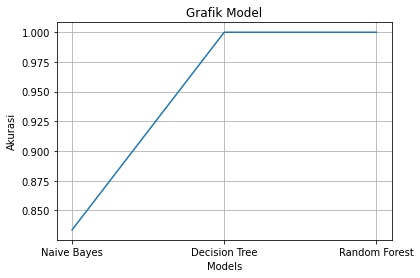

In [39]:
import matplotlib.pyplot as plt

y = [nb_model, dt_model, rf_model]
x = ["Naive Bayes", "Decision Tree", "Random Forest"]
plt.plot(x, y)

plt.xlabel('Models')
plt.ylabel('Akurasi')

plt.title('Grafik Model')
plt.grid(True)

plt.show()